In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import special

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime, date
from pmdarima import auto_arima

import statistics
import statsmodels.graphics.tsaplots as sgt

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



plt.rcParams["figure.figsize"] = (10,8)
 

In [13]:
data = pd.read_csv('/home/camilocorredor/Documents/Data_Science_Projects/Euro_Dolar/Data/Data_USD_2.csv', sep = ',')
data.head(5)

,Unnamed: 0,Date,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
0,0,6/12/2021,1.1281,1.1304,1.1311,1.1267,-0.20,48909.1,6865.78,15380.79,35304.13,4137.11,23349.38,8439.7,15817.47,4591.67,3590.01,7232.28,69.33,Bajo
1,1,5/12/2021,1.1305,1.1321,1.1321,1.1301,-0.08,49405.5,6865.78,15380.79,35304.13,4137.11,23349.38,8439.7,15817.47,4591.67,3590.01,7232.28,67.95,Bajo
2,2,3/12/2021,1.1313,1.1301,1.1334,1.1265,0.12,53631.5,6765.52,15169.98,34579.55,4080.15,23766.69,8241.7,15712.04,4538.43,3607.43,7122.32,66.74,Subio
3,3,2/12/2021,1.1299,1.1320,1.1349,1.1294,-0.18,56496.0,6795.75,15263.11,34641.70,4108.02,23788.93,8300.8,15990.76,4577.10,3573.84,7129.21,67.84,Bajo
4,4,1/12/2021,1.1319,1.1339,1.1360,1.1302,-0.15,57210.3,6881.87,15472.67,34021.61,4179.15,23658.92,8452.6,15877.72,4513.04,3576.89,7168.68,66.77,Bajo


In [4]:
data['Date'] = data['Date'].apply(lambda x: pd.Timestamp(x))
data.set_index('Date', inplace = True)


In [5]:
data = data.drop(columns='Fecha')

In [6]:
data = data.iloc[::-1]
data.head(5)

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,14237.42,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo
2005-04-01,1.3272,1.3466,1.3496,1.3249,-1.42,NaN,3863.30,4290.50,10630.78,NaN,14045.90,9120.0,1571.83,NaN,1242.77,4847.0,42.28,Bajo
2005-05-01,1.3262,1.3282,1.3305,1.3215,-0.08,NaN,3829.36,4258.24,10597.83,NaN,13764.36,9024.4,1563.76,NaN,1251.94,4806.0,43.34,Bajo
2005-06-01,1.3171,1.3262,1.3286,1.3156,-0.69,NaN,3856.48,4300.94,10622.88,NaN,13712.04,NaN,1557.52,NaN,1239.43,4824.3,43.17,Bajo
2005-07-01,1.3054,1.3171,1.3251,1.3024,-0.89,NaN,3877.96,4316.40,10603.96,NaN,13574.86,9041.1,1564.81,NaN,1244.75,4854.1,45.52,Bajo


In [87]:
data2 = data.copy()
data2 = data.asfreq('b')
data2.index
# data.index

DatetimeIndex(['2005-03-01', '2005-03-02', '2005-03-03', '2005-03-04',
               '2005-03-07', '2005-03-08', '2005-03-09', '2005-03-10',
               '2005-03-11', '2005-03-14',
               ...
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-04', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11'],
              dtype='datetime64[ns]', name='Date', length=4249, freq='B')

In [128]:
data2.head()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,14237.42,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo
2005-03-02,1.2973,1.3026,1.3038,1.2939,-0.48,NaN,3928.94,4281.64,10593.10,NaN,13515.33,9310.4,1508.24,NaN,1242.31,4908.3,46.31,Bajo
2005-03-03,1.3110,1.3141,1.3168,1.3097,-0.16,NaN,4061.35,4373.27,10833.03,NaN,13892.37,9418.8,1511.89,NaN,1294.34,5014.8,53.13,Bajo
2005-03-04,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-07,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


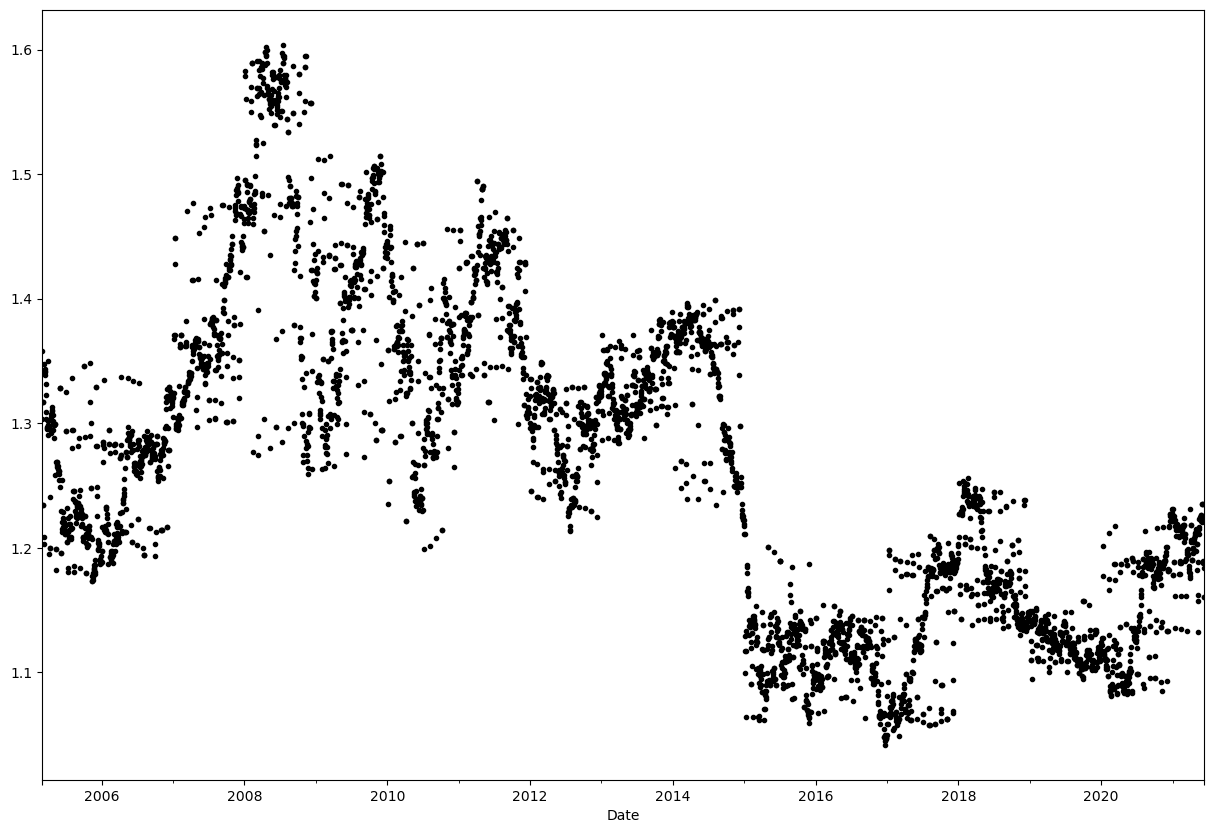

In [172]:
data2['Máximo'].plot(style = 'k.')
plt.show()

In [174]:
data3 = data2.copy()
data3


,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,14237.42,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo
2005-03-02,1.2973,1.3026,1.3038,1.2939,-0.48,NaN,3928.94,4281.64,10593.10,NaN,13515.33,9310.4,1508.24,NaN,1242.31,4908.30,46.31,Bajo
2005-03-03,1.3110,1.3141,1.3168,1.3097,-0.16,NaN,4061.35,4373.27,10833.03,NaN,13892.37,9418.8,1511.89,NaN,1294.34,5014.80,53.13,Bajo
2005-03-04,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-07,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,1.1822,1.1863,1.1896,1.1806,-0.33,34225.6,6507.48,15511.38,34577.37,4052.67,28072.86,8860.8,14786.36,7620.1,3530.26,7100.88,73.77,Bajo
2021-06-08,1.1760,1.1834,1.1837,1.1753,-0.61,42795.4,6816.96,15761.45,35208.51,4174.54,26179.40,8879.0,15109.36,7677.3,3458.23,7122.95,68.02,Bajo
2021-06-09,1.1868,1.1879,1.1888,1.1855,-0.12,52672.1,6743.50,15932.12,NaN,4246.13,26163.63,8882.3,NaN,NaN,3621.86,7187.18,68.89,Bajo


In [177]:
# d3 = np.asarray(data3)
print(data3['Máximo'][3])
print(len(d3))
for idx in range(0, len(data3)):
    if idx > 0:
        vl = data3['Máximo'][idx - 1]
        if pd.isna(data3['Máximo'][idx]):
            data3['Máximo'][idx] = vl

data3.head()

1.3168
4249


,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,14237.42,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo
2005-03-02,1.2973,1.3026,1.3038,1.2939,-0.48,NaN,3928.94,4281.64,10593.10,NaN,13515.33,9310.4,1508.24,NaN,1242.31,4908.3,46.31,Bajo
2005-03-03,1.3110,1.3141,1.3168,1.3097,-0.16,NaN,4061.35,4373.27,10833.03,NaN,13892.37,9418.8,1511.89,NaN,1294.34,5014.8,53.13,Bajo
2005-03-04,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-07,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


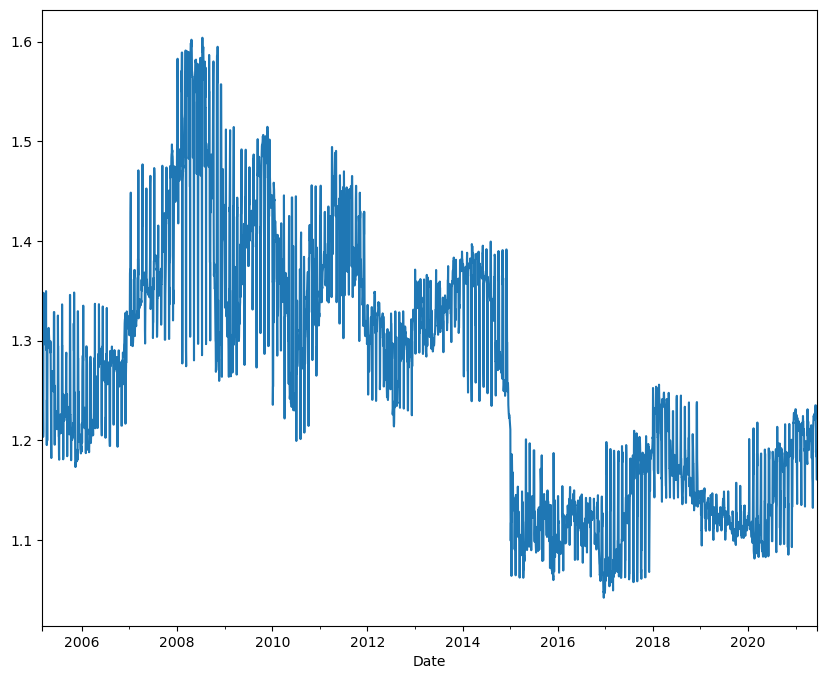

In [180]:
data3['Máximo'].plot()
plt.show()

In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4249 entries, 2005-03-01 to 2021-06-11
Freq: B
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre       3791 non-null   float64
 1   Apertura     3791 non-null   float64
 2   Máximo       4249 non-null   float64
 3   Mínimo       3791 non-null   float64
 4   var%         3791 non-null   float64
 5   Bitcoin      2539 non-null   float64
 6   CAC40        3716 non-null   float64
 7   DAX          3690 non-null   float64
 8   DowJones     3654 non-null   float64
 9   EuroStoxx50  2249 non-null   float64
 10  HangSeng     3605 non-null   float64
 11  IBEX35       3707 non-null   float64
 12  Nasdaq100    3654 non-null   float64
 13  S&P500       3262 non-null   float64
 14  Shangai      3556 non-null   float64
 15  FTSE_GB      3661 non-null   float64
 16  WTI_USD      3675 non-null   float64
 17  Tendencia    3791 non-null   object 
dtypes: float64(17), object

In [181]:
size = int(len(data3)*0.7)
dTrain = data3.iloc[:size]
dTest = data3.iloc[size:]

In [182]:
dTrain.tail()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2016-07-18,1.1074,1.1043,1.1086,1.1038,0.34,670.4,4357.74,10063.13,18533.05,2949.17,21803.18,8524.4,4619.68,5376.4,3043.56,6695.42,45.22,Subio
2016-07-19,1.1022,1.1073,1.1086,1.0999,-0.47,671.1,4330.13,9981.24,18559.01,2931.10,21673.20,8485.2,4603.28,5336.5,3036.60,6697.37,44.47,Bajo
2016-07-20,1.1015,1.1020,1.1032,1.0981,-0.06,664.4,4379.76,10142.01,18595.03,2966.95,21882.48,8575.5,4657.20,5348.7,3027.90,6728.99,44.94,Bajo
2016-07-21,1.1025,1.1013,1.1060,1.0981,0.09,664.6,4376.25,10156.21,18517.23,2968.49,22000.49,8583.6,4647.02,5345.3,3039.01,6699.89,44.53,Subio
2016-07-22,1.0976,1.1030,1.1043,1.0954,-0.44,651.1,4381.10,10147.46,18570.85,2972.23,21964.27,8599.9,4666.07,5373.2,3012.82,6730.48,44.27,Bajo


In [183]:
dTest.head()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2016-07-25,1.0994,1.0972,1.1002,1.0954,0.16,654.0,4388.00,10198.24,18493.06,2973.22,21993.44,8575.7,4665.93,5357.4,3015.83,6710.13,43.05,Subio
2016-07-26,1.0987,1.0997,1.1031,1.0978,-0.06,654.4,4394.77,10247.76,18473.75,2978.90,22129.73,8560.2,4672.11,5392.0,3050.17,6724.03,42.65,Bajo
2016-07-27,1.1058,1.0986,1.1068,1.0963,0.65,654.5,4446.96,10319.55,18472.17,2999.48,22218.99,8661.4,4702.89,5354.6,2992.00,6750.43,41.89,Subio
2016-07-28,1.1075,1.1058,1.1119,1.1048,0.15,654.1,4420.58,10274.93,18456.35,2966.10,22174.34,8479.2,4721.41,5350.2,2994.32,6721.06,41.11,Subio
2016-07-29,1.1174,1.1079,1.1200,1.1071,0.89,655.4,4439.81,10337.50,18432.24,2990.76,21891.37,8587.2,4730.23,5361.0,2979.34,6724.43,41.38,Subio


In [184]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     if dftest[1] < 0.05:
         print('Los datos son estacionarios')
     else: 
         print('Los datos no son estacionarios')   
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [185]:
ad_test(data['Máximo'])

1. ADF :  -2.040898748698887
2. P-Value :  0.2689331866534914
Los datos no son estacionarios
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 4414
5. Critical Values :
	 1% :  -3.4318323531891304
	 5% :  -2.862195020678692
	 10% :  -2.567118671586822


In [186]:
dTrain['First Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(1)
dTrain['Seasonal 1 Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(12)

<ipython-input-186-1c4e075a0ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['First Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(1)
<ipython-input-186-1c4e075a0ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['Seasonal 1 Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(12)


In [57]:
dTrain.head()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,...,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia,res_arm_1_1_1,First Difference,Seasonal 1 Difference
Date,,,,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,...,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo,NaN,NaN,NaN
2005-03-02,1.2973,1.3026,1.3038,1.2939,-0.48,NaN,3928.94,4281.64,10593.10,NaN,...,9310.4,1508.24,NaN,1242.31,4908.3,46.31,Bajo,-0.006038,-0.0544,NaN
2005-03-03,1.3110,1.3141,1.3168,1.3097,-0.16,NaN,4061.35,4373.27,10833.03,NaN,...,9418.8,1511.89,NaN,1294.34,5014.8,53.13,Bajo,-0.001664,0.0130,NaN
2005-03-04,NaN,NaN,1.2712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0456,NaN
2005-03-07,NaN,NaN,1.2712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN


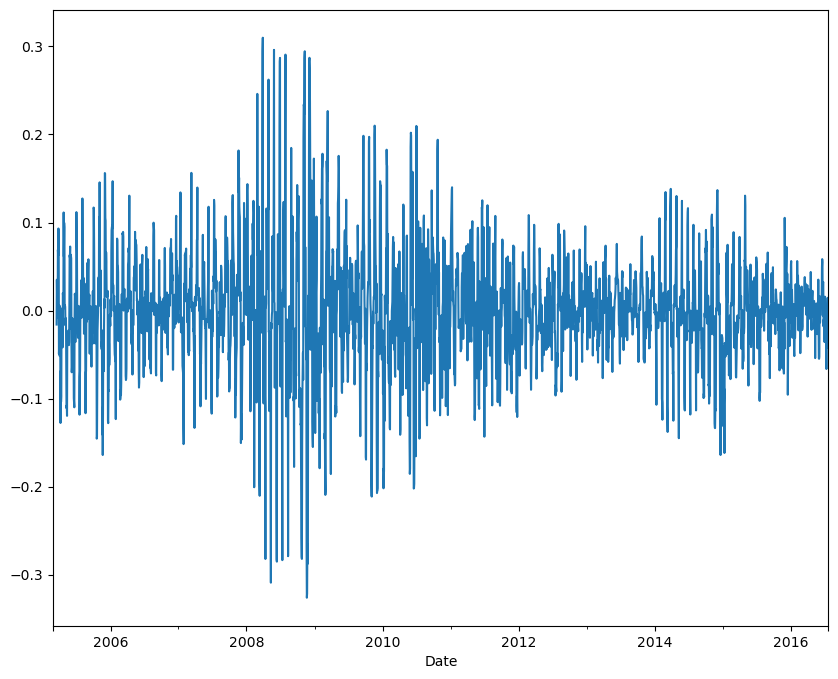

In [187]:
dTrain['Seasonal 1 Difference'].plot()
plt.show()

In [188]:
ad_test(dTrain['First Difference'].dropna())

1. ADF :  -17.88049577659369
2. P-Value :  3.00369590015872e-30
Los datos son estacionarios
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 2950
5. Critical Values :
	 1% :  -3.4325686438295246
	 5% :  -2.862520250798378
	 10% :  -2.567291814306234


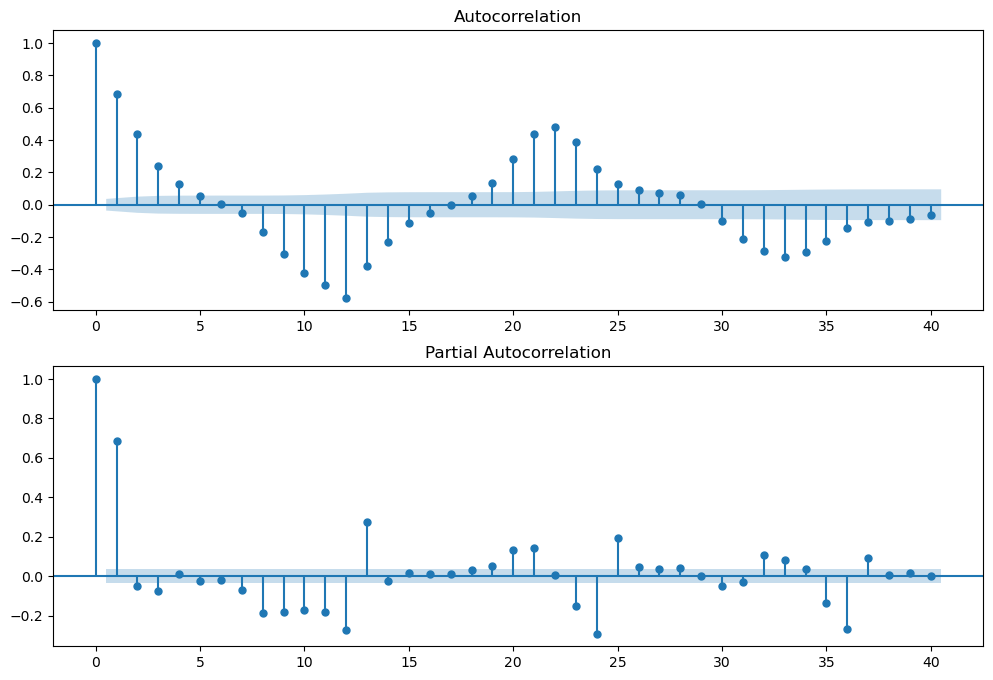

In [193]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dTrain['Seasonal 1 Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dTrain['Seasonal 1 Difference'].dropna(),lags=40,ax=ax2)
plt.show()

In [15]:
stepwise_fit = auto_arima(data['Máximo'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-31811.696, Time=6.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31743.599, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31814.336, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31816.643, Time=2.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31745.335, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31814.700, Time=3.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31814.735, Time=2.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31812.495, Time=1.76 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31818.435, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31816.490, Time=0.61 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-31816.521, Time=0.79 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31816.130, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-31814.279, Time=1.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 20.999 sec

In [219]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data3['Máximo'], order=(6,1,6))
model_fit = model.fit()
model_fit.summary()

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bs

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Máximo   No. Observations:                 4248
Model:                 ARIMA(6, 1, 6)   Log Likelihood                8737.244
Method:                       css-mle   S.D. of innovations              0.031
Date:                Wed, 02 Mar 2022   AIC                         -17446.487
Time:                        23:30:35   BIC                         -17357.528
Sample:                    03-02-2005   HQIC                        -17415.050
                         - 06-11-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.377e-05      7e-05     -0.339      0.734      -0.000       0.000
ar.L1.D.Máximo     0.5127        nan        nan        nan         nan         nan
ar.L2.D.Máximo    -0.1345        nan        nan        nan         nan         nan
ar.L3.D.Máximo    -0.0579      0.096     -0.605      0.545      -0.246       0.130
ar.L4.D.Máximo    -0.7779      0.088     -8.863      0.000      -0.950      -0.606
ar.L5.D.Máximo     0.5022        nan        nan        nan         nan         nan
ar.L6.D.Máximo     0.0322        nan        nan        nan         nan         nan
ma.L1.D.Máximo    -0.7802        nan        nan        nan         nan         nan
ma.L2.D.Máximo     0.0874        nan        nan        nan         nan         nan
ma.L3.D.Máximo    -0.0592      0.108     -0.549      0.583      -0.271       0.152
ma.L4.D.Máximo     0.7353      0.099      7.405      0.000       0.541       0.930
ma.L5.D.Máximo    -0.7738        nan        nan        nan         nan         nan
ma.L6.D.Máximo    -0.0737        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7409           -0.7564j            1.0587           -0.3734
AR.2           -0.7409           +0.7564j            1.0587            0.3734
AR.3            0.6435           -0.7731j            1.0058           -0.1395
AR.4            0.6435           +0.7731j            1.0058            0.1395
AR.5            1.6097           -0.0000j            1.6097           -0.0000
AR.6          -16.9977           -0.0000j           16.9977           -0.5000
MA.1            1.0559           -0.0000j            1.0559           -0.0000
MA.2            0.6397           -0.7871j            1.0142           -0.1414
MA.3            0.6397           +0.7871j            1.0142            0.1414
MA.4           -0.7256           -0.7554j            1.0475           -0.3718
MA.5           -0.7256           +0.7554j            1.0475            0.3718
MA.6          -11.3777           -0.0000j           11.3777           -0.5000
-----------------------------------------------------------------------------
"""

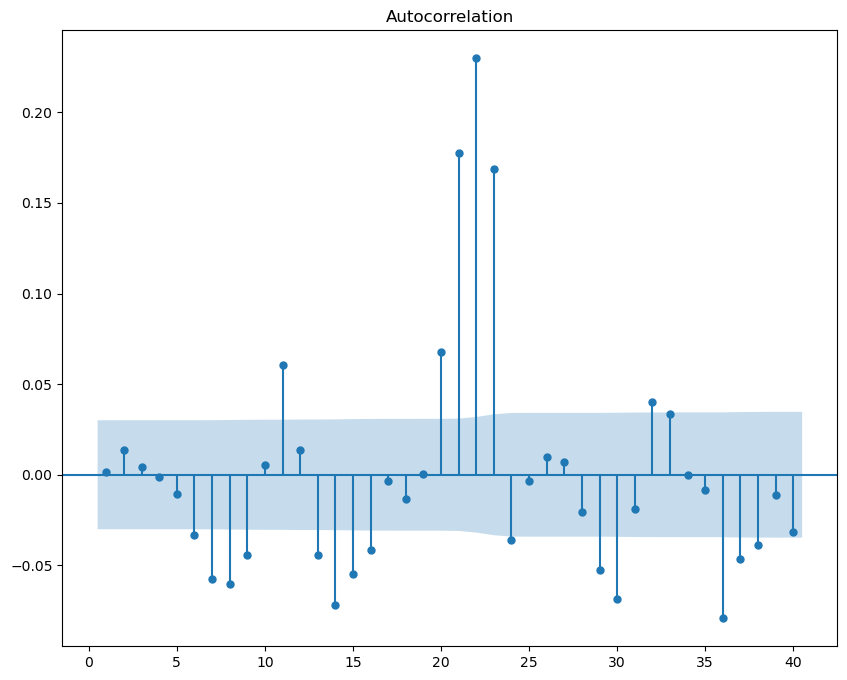

In [220]:
data3['Resid_model_0_1_1'] = model_fit.resid
sgt.plot_acf(data3.Resid_model_0_1_1[1:], zero=False, lags=40)
plt.show()


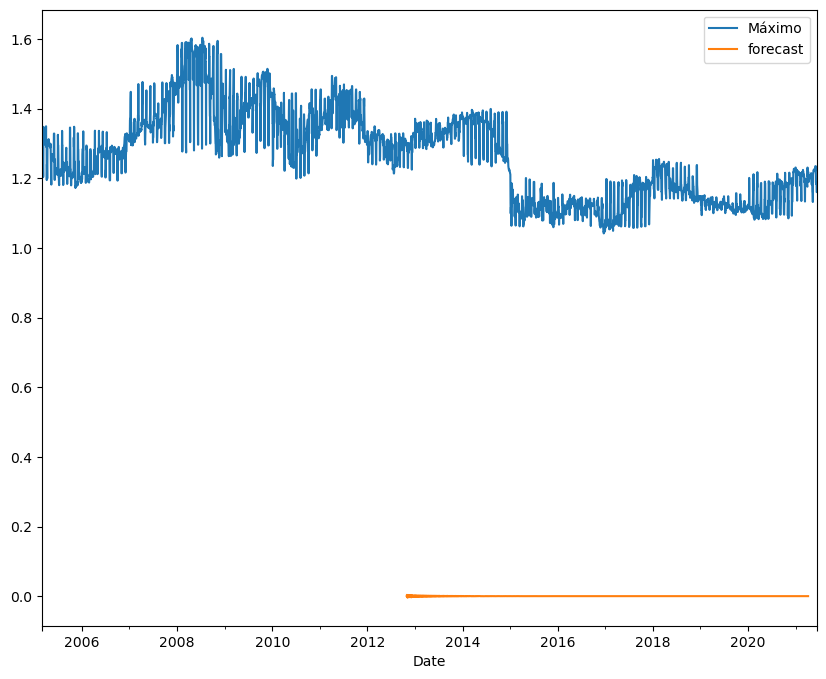

In [221]:
data3['forecast'] = model_fit.predict(start = 2000, end = 4200, dynamic=True)
data3[['Máximo', 'forecast']].plot()
plt.show()

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


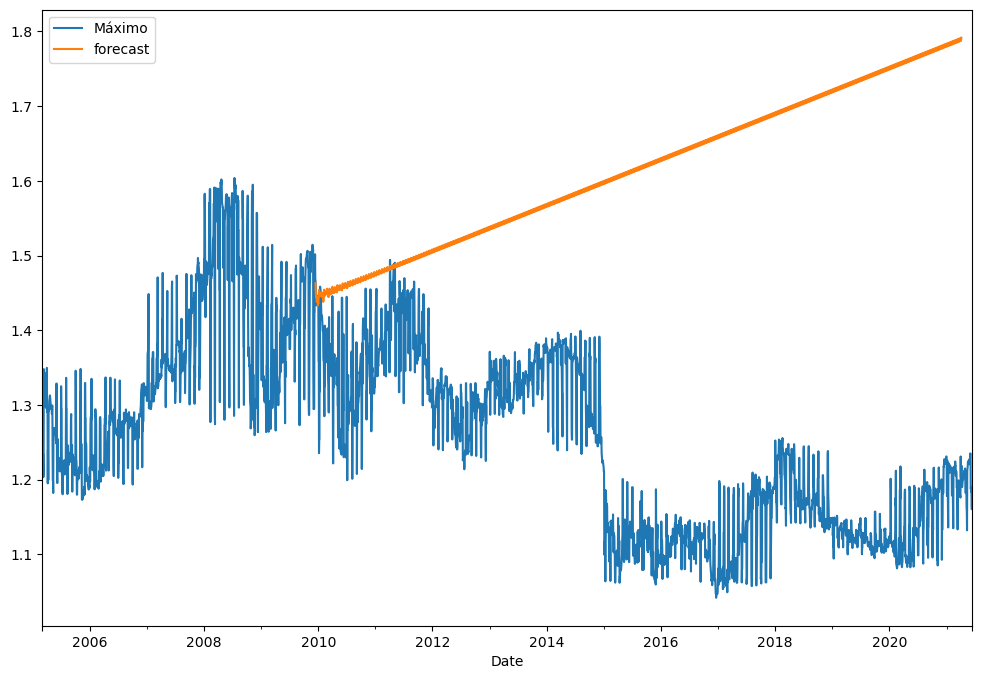

In [222]:
model=sm.tsa.statespace.SARIMAX(data3['Máximo'],order=(1, 1, 1),seasonal_order=(4,1,4,6))
results=model.fit()
data3['forecast']=results.predict(start=1250,end=4200,dynamic=True)
data3[['Máximo','forecast']].plot(figsize=(12,8))
plt.show()

<AxesSubplot:xlabel='Date'>

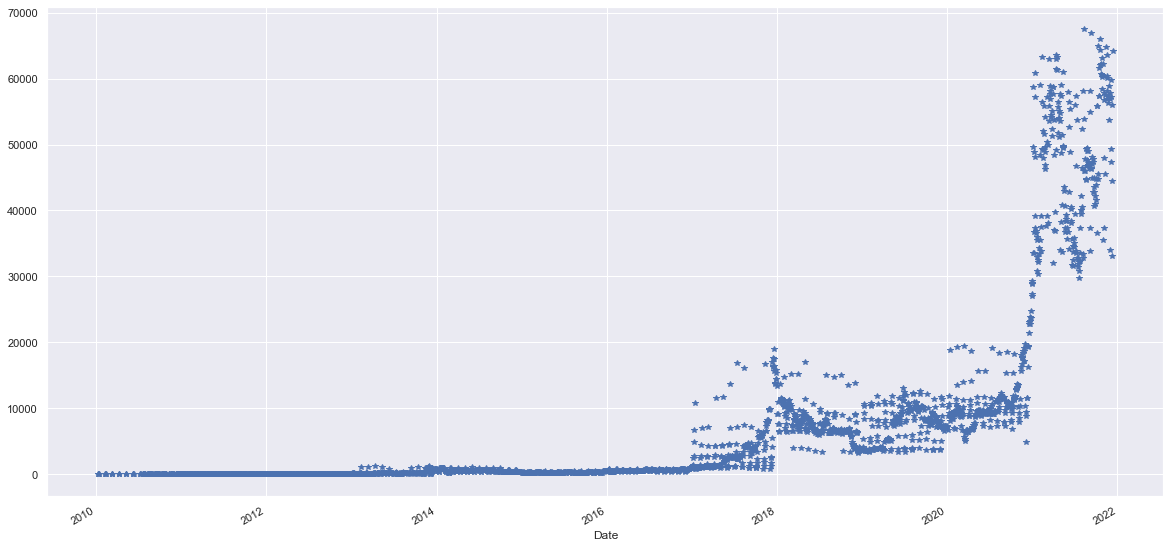

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
data['Bitcoin'].plot(marker = '*', alpha = 1, linestyle = 'none')

In [22]:
# F1 = list(data['Date'].value_counts().index)
F2 = list(data['Cierre'].value_counts().index)
F3 = list(data['Apertura'].value_counts().index)
F4 = list(data['Máximo'].value_counts().index)
F5 = list(data['Mínimo'].value_counts().index)
F6 = list(data['var%'].value_counts().index)
F7 = list(data['Bitcoin'].value_counts().index)
F8 = list(data['CAC40'].value_counts().index)
F9 = list(data['DAX'].value_counts().index)
F10 = list(data['DowJones'].value_counts().index)
F11 = list(data['EuroStoxx50'].value_counts().index)
F12 = list(data['HangSeng'].value_counts().index)
F13 = list(data['Nasdaq100'].value_counts().index)
F14 = list(data['S&P500'].value_counts().index)
F15 = list(data['Shangai'].value_counts().index)
F16 = list(data['FTSE_GB'].value_counts().index)
F17 = list(data['WTI_USD'].value_counts().index)
C = list(data['Tendencia'].value_counts().index)

In [9]:
Indicador = MissingIndicator(missing_values = np.nan) 
Indicador.fit(data) 
Datos_Indicador = Indicador.transform(data) 
#display(Datos_Indicador) 
print(f'Características donde hay datos faltantes: "{Indicador.features_}')
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print(f'Porcentaje de Datos Faltantes: " {round(100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])),3)}%')

Características donde hay datos faltantes: "[ 5  6  7  8  9 10 11 12 13 14 15 16]
Porcentaje de Datos Faltantes: " 9.888%


<AxesSubplot:title={'center':'Distribución de la variable de salida'}>

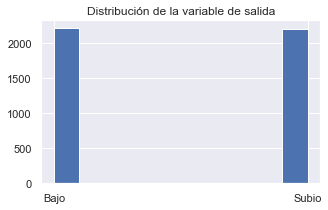

In [10]:
categorias = data['Tendencia'].groupby(data['Tendencia']).count()
categorias
plt.figure(figsize=(5,3))
plt.title('Distribución de la variable de salida')
data['Tendencia'].hist()


In [72]:
nombres = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
data_KN5 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform') 
imp.fit(data_KN5)
data_KN5 = imp.transform(data_KN5)
#print(DatosF_Imp_Vf)
data_KN5 = pd.DataFrame(data_KN5, columns = nombres)
data_KN5

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD
0,1.3463,1.3547,1.3582,1.3386,-0.70,12789.20,3855.68,4291.53,10729.430,2217.802,14237.420,9124.10,1603.510,1945.66,2515.790,4964.10,42.22
1,1.3272,1.3466,1.3496,1.3249,-1.42,8239.66,3863.30,4290.50,10630.780,2177.958,14045.900,9120.00,1571.830,1954.12,1242.770,4847.00,42.28
2,1.3262,1.3282,1.3305,1.3215,-0.08,8789.78,3829.36,4258.24,10597.830,2217.802,13764.360,9024.40,1563.760,1954.12,1251.940,4806.00,43.34
3,1.3171,1.3262,1.3286,1.3156,-0.69,6862.68,3856.48,4300.94,10622.880,2217.802,13712.040,9068.88,1557.520,2051.64,1239.430,4824.30,43.17
4,1.3054,1.3171,1.3251,1.3024,-0.89,6862.68,3877.96,4316.40,10603.960,2217.802,13574.860,9041.10,1564.810,1954.12,1244.750,4854.10,45.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,1.1319,1.1339,1.1360,1.1302,-0.15,57210.30,6881.87,15472.67,34021.610,4179.150,23658.920,8452.60,15877.720,7530.00,3576.890,7168.68,66.77
4413,1.1299,1.1320,1.1349,1.1294,-0.18,56496.00,6795.75,15263.11,34641.700,4108.020,23788.930,8300.80,15990.760,7762.50,3573.840,7129.21,67.84
4414,1.1313,1.1301,1.1334,1.1265,0.12,53631.50,6765.52,15169.98,34579.550,4080.150,23766.690,8241.70,15712.040,7704.30,3607.430,7122.32,66.74
4415,1.1305,1.1321,1.1321,1.1301,-0.08,49405.50,4502.05,5552.55,10735.412,4099.972,16534.392,10627.28,1601.718,2649.92,1220.028,5564.24,67.95


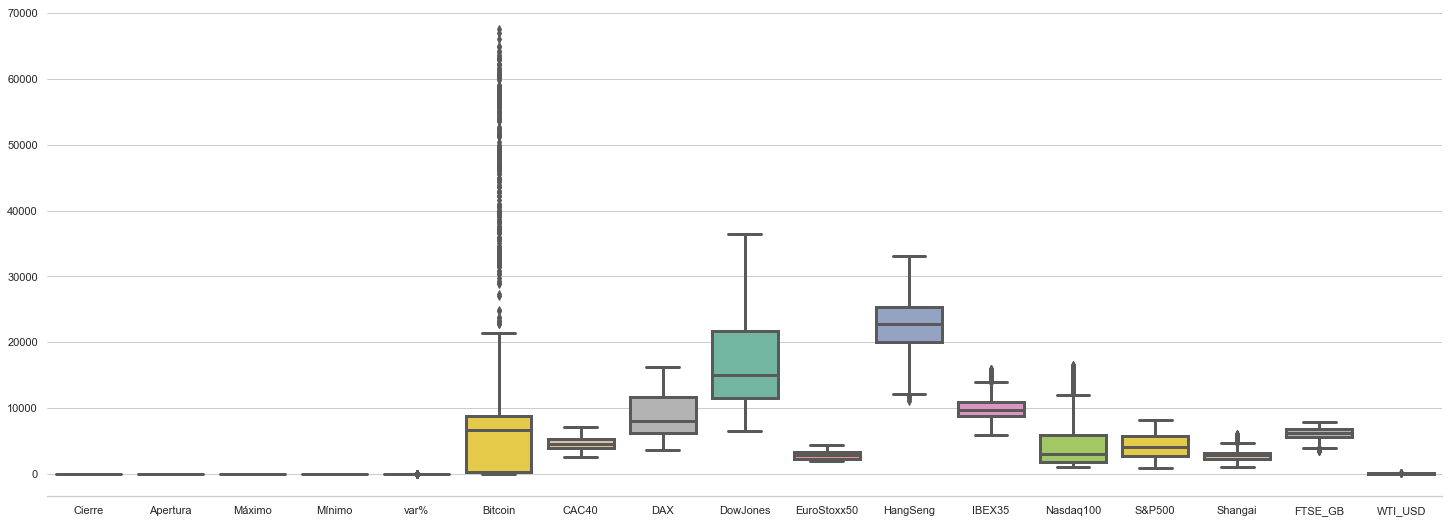

In [12]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_KN5, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [15]:
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
scaler = StandardScaler()
data_fit = scaler.fit_transform(data_KN5)
data_fit = pd.DataFrame(data = data_KN5, columns = Caracteristicas)

<AxesSubplot:>

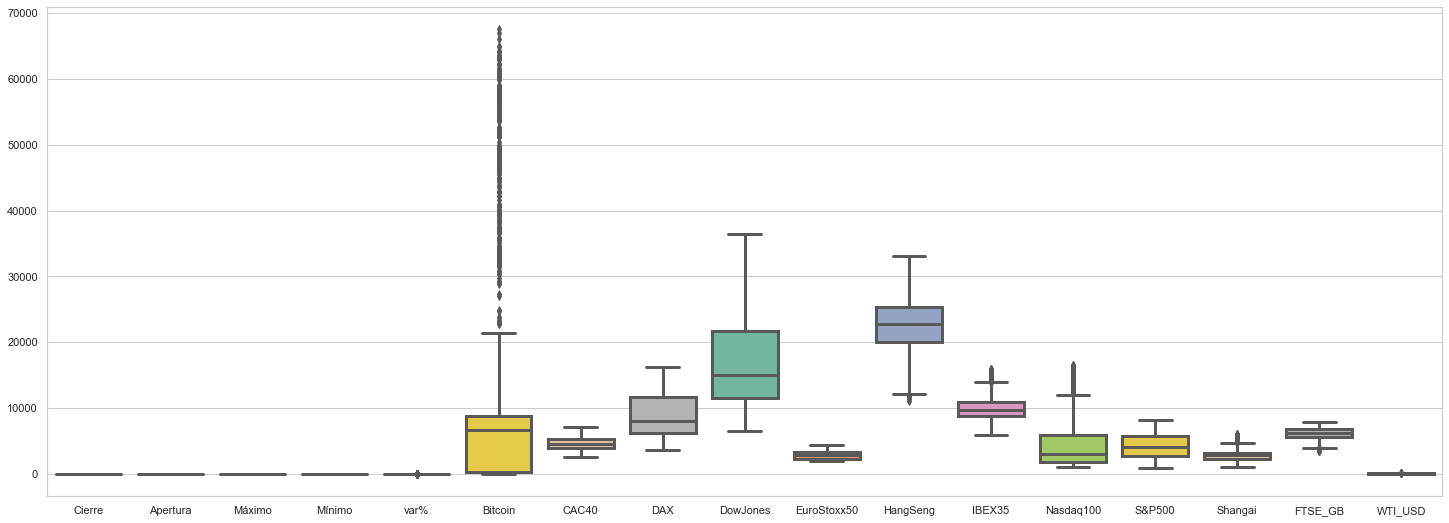

In [16]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_fit, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f6a5e0b0490> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


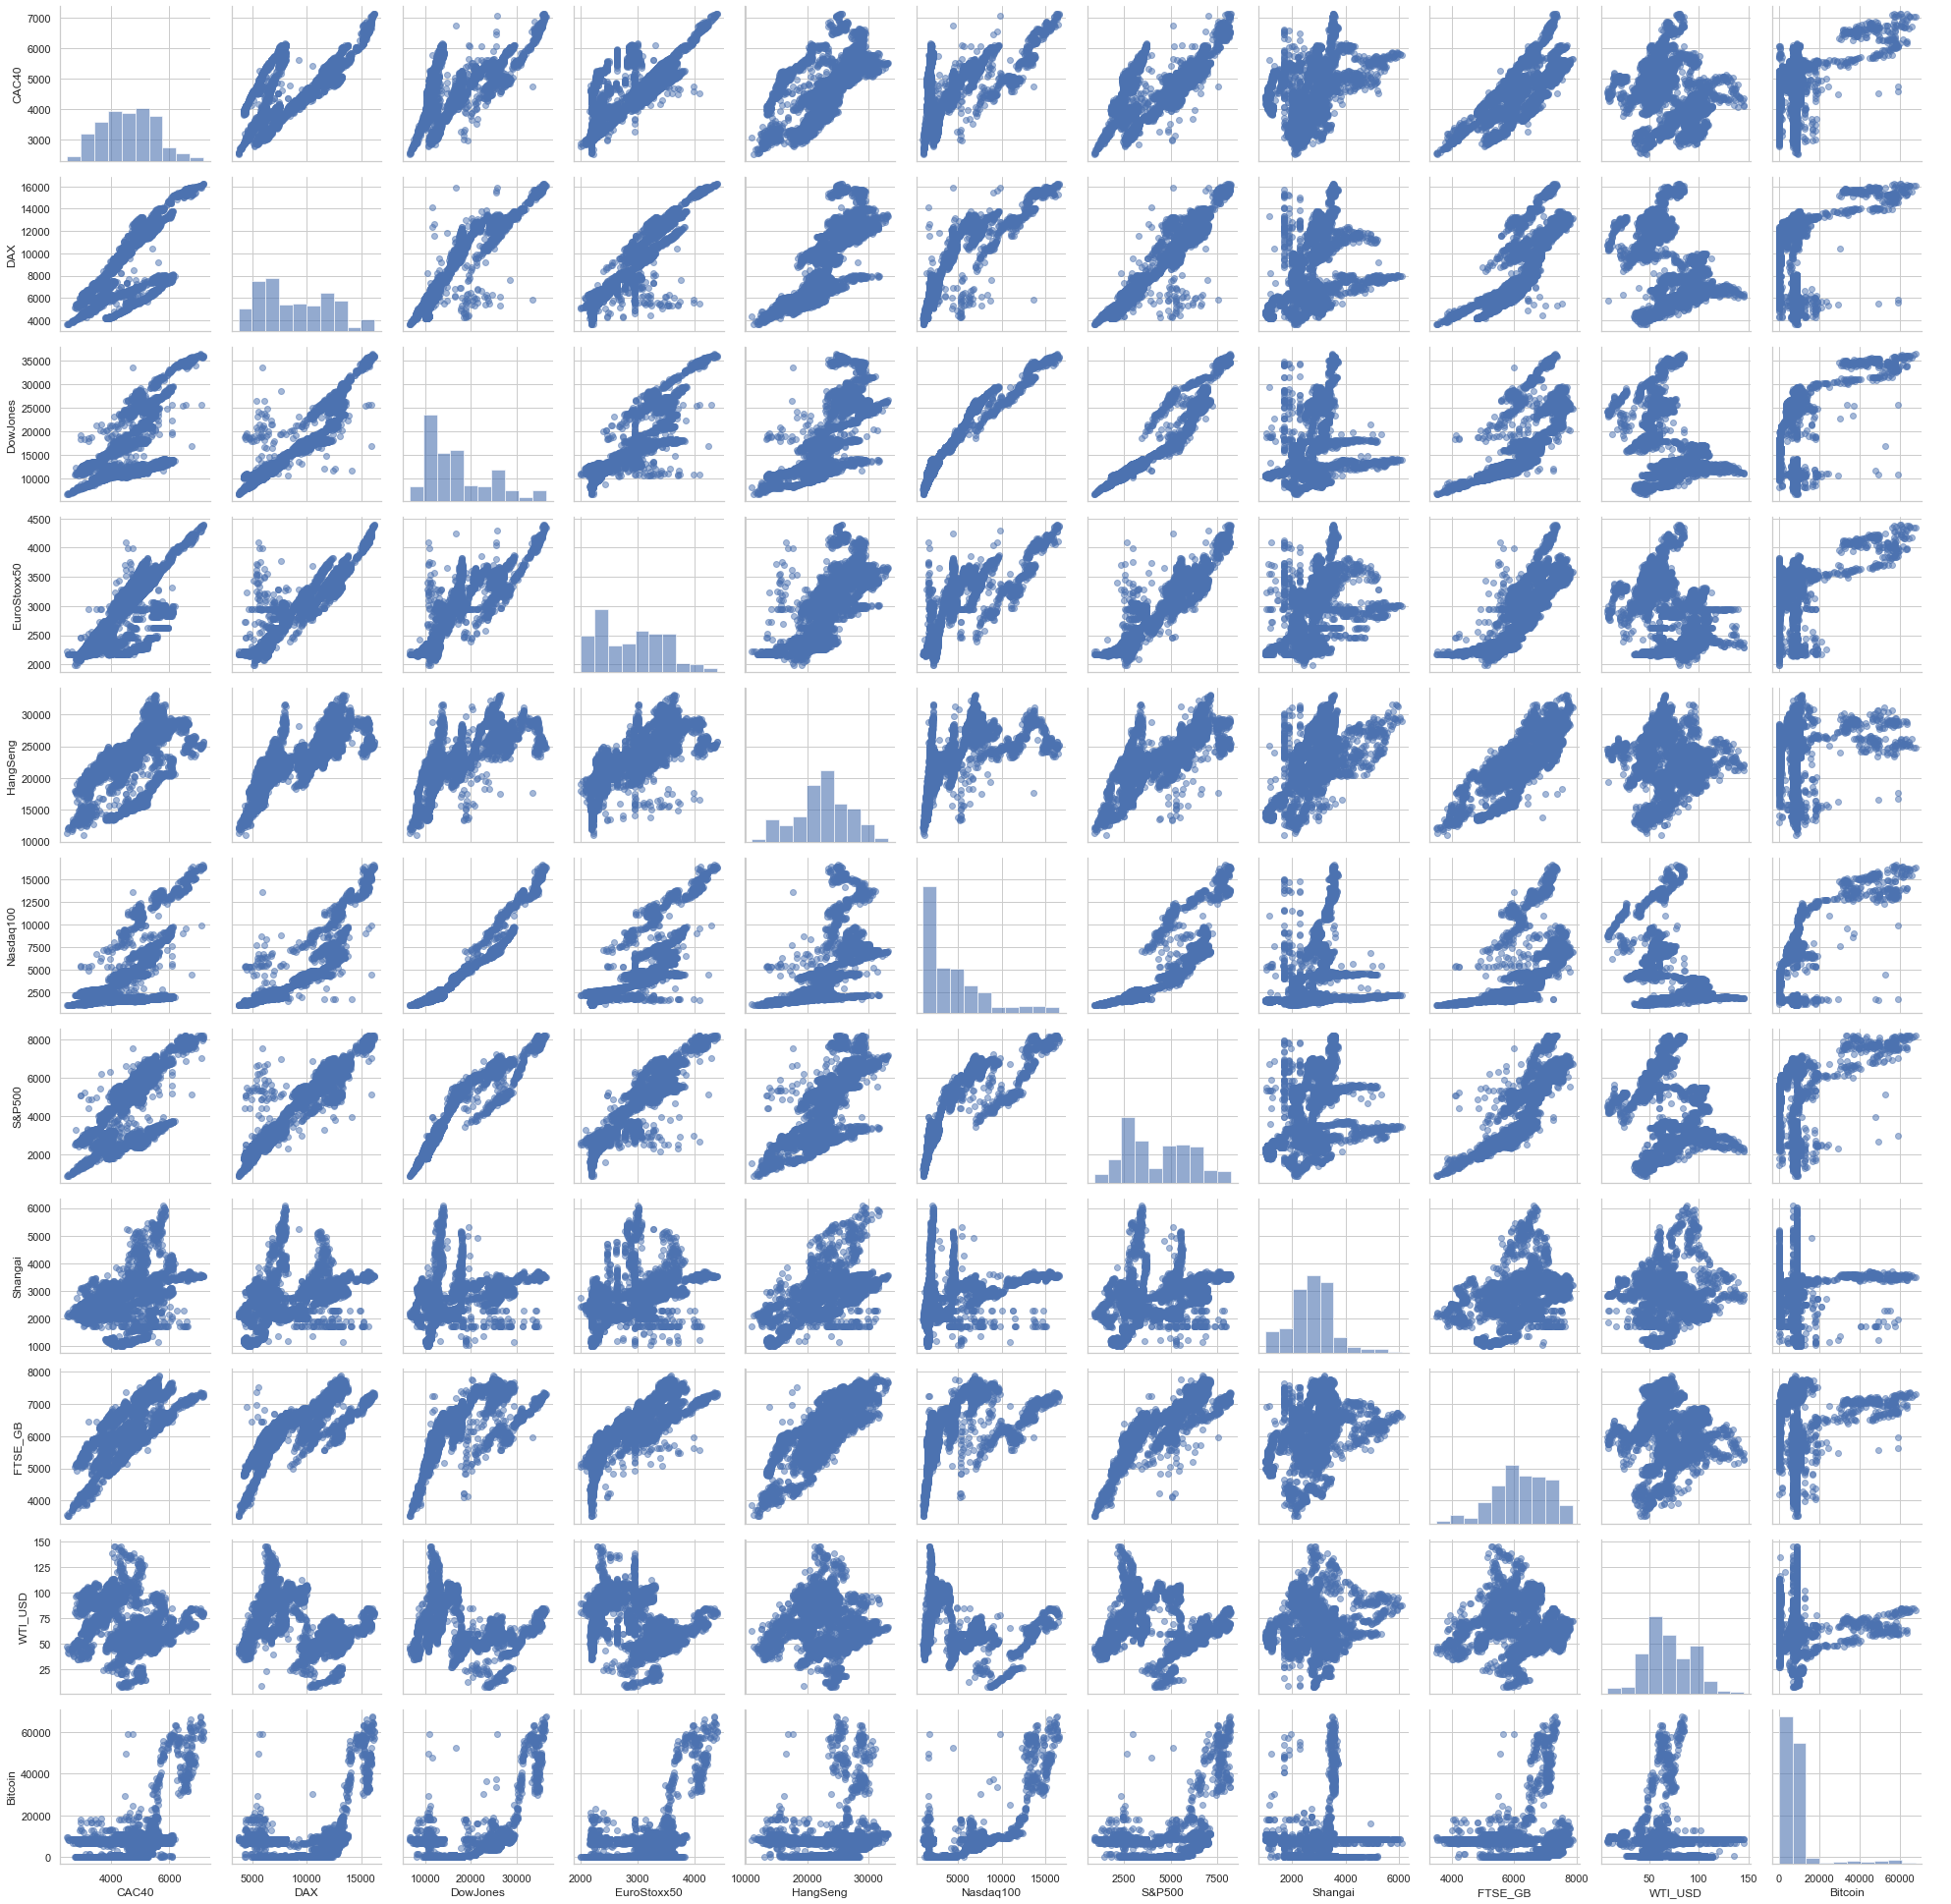

In [17]:
graph = sns.PairGrid(data_fit, vars= ['CAC40','DAX','DowJones','EuroStoxx50','HangSeng','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD','Bitcoin'])
#DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD'])  
graph.map_diag(plt.hist, alpha = 0.6)
graph.map_offdiag(plt.scatter, alpha = 0.5)
graph.add_legend() 

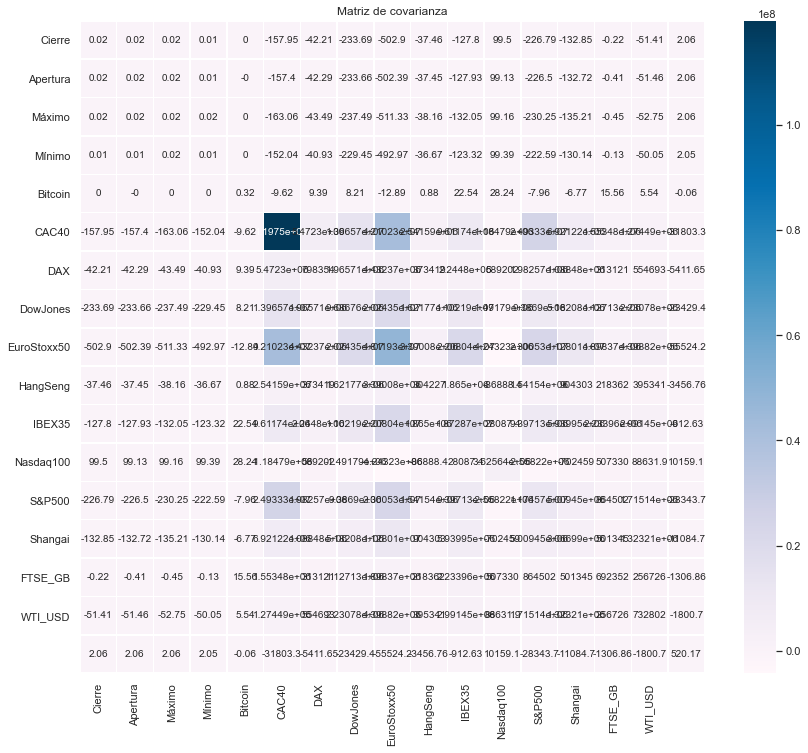

In [18]:
MCova = np.round(np.cov(data_fit.transpose(), bias=True),2) 
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']

plt.figure(figsize=(14,12))
plt.title('Matriz de covarianza')
ax = sns.heatmap(MCova, annot=True, annot_kws={'size':10}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas,cmap="PuBu", linewidths=.5)
plt.show()

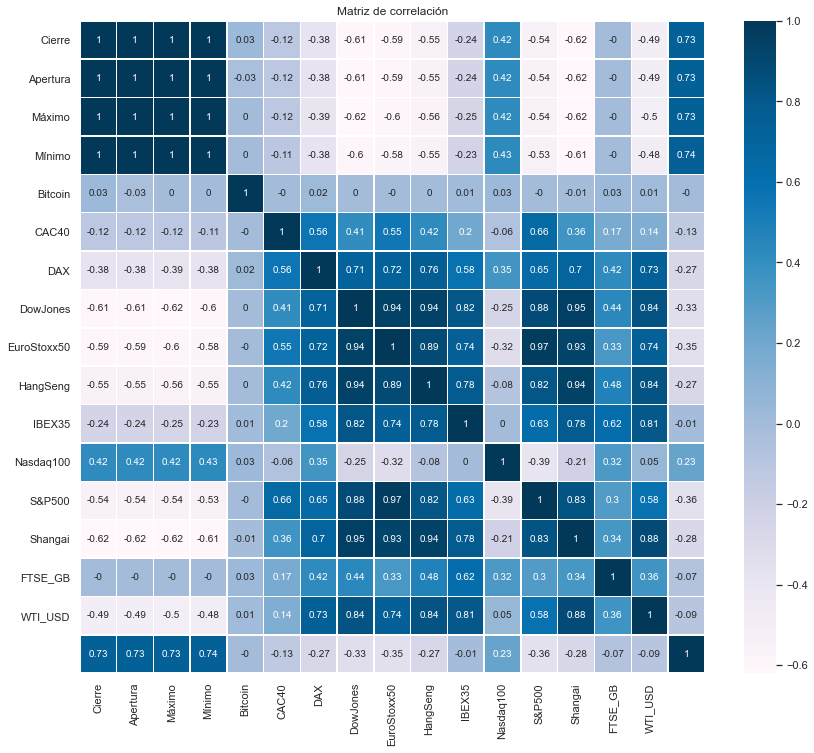

In [20]:
Mcor = round(data_fit.corr(),2)
plt.figure(figsize=(14,12))
plt.title('Matriz de correlación')
ax = sns.heatmap(Mcor,annot=True, annot_kws={'size':10}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu",linewidths=.5)
plt.show()

In [21]:
r = []
valor_p = []
Datos_SS = data_fit.values
Datos_SS = np.asarray(data_fit)

for _,n in enumerate(np.arange(0,Datos_SS.shape[1])):
   for _,m in enumerate(np.arange(0,Datos_SS.shape[1])):  
       r_valor, p_valor = pearsonr(Datos_SS[:,n], Datos_SS[:,m])
       r.append(round(r_valor,3))
       valor_p.append(round(p_valor,3))

r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])
p_value = valor_p.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])

plt.figure(figsize=(10,10))
plt.title('Matriz coeficiente de correlación de Spearman')
ax = sns.heatmap(pearson_r, annot=True, annot_kws={'size':7}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu")
plt.show()

NameError: name 'data_IVf_SS' is not defined

In [23]:
le = preprocessing.LabelEncoder()

X = data_KN5[['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
Y = data[['Tendencia']]

le.fit(Y['Tendencia'].unique())
Y = le.transform(Y['Tendencia'].values)
Y

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
#estimators =[100,140,180,240,300,400,500]
estimators =[500,600,700]
#depth = [12,14,18,20,25,30]
depth = [14,18,20]

rf = RandomForestClassifier(random_state=0)

parameters = {'n_estimators':estimators, 'max_depth':depth}

clf3 = GridSearchCV(estimator=rf, param_grid = parameters, scoring='balanced_accuracy',return_train_score=True)
clf3.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [14, 18, 20],
                         'n_estimators': [500, 600, 700]},
             return_train_score=True, scoring='balanced_accuracy')

In [26]:
clf3.best_params_

{'max_depth': 18, 'n_estimators': 600}

Balanced Accuracy = 0.7170334613387619


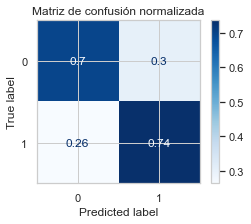

In [30]:
print('Balanced Accuracy = '+str(balanced_accuracy_score(y_test,clf3.predict(X_test))))

fig, ax1 = plt.subplots(1, 1, figsize=(4,3))
plt.title("Matriz de confusión normalizada")

disp = plot_confusion_matrix(clf3, X_test, y_test,

cmap=plt.cm.Blues,
normalize='true',ax=ax1)
#print(title)
#print(disp.confusion_matrix)

plt.show() 